In [1]:
from sqlalchemy import create_engine
import pymysql

db_connection_str = 'mysql+pymysql://<your_account>:<your_password>@<your_ip>/ML_data'
db_connection = create_engine(db_connection_str)

df = pd.read_sql('SELECT * FROM datas', con=db_connection)
df = df.set_index('player_name')

df.tail(2)

,position,age,height,weight,rating,value,follower,shots_total,shots_on,goals_total,...,penalty_commited,penalty_success,penalty_missed,penalty_saved,games_appearences,games_lineups,substitutes_in,substitutes_out,substitutes_bench,games_played
player_name,,,,,,,,,,,,,,,,,,,,,
Y. Poulsen,4.0,26.0,192.0,84.0,6.54545,24.0,109000,2.0141,0.7524,0.3357,...,0.0,0.0116,0.0,0.0,1.4006,0.9492,0.4514,0.2894,0.5788,86.3889
Y. Tielemans,2.0,23.0,176.0,72.0,4.38462,44.0,282254,1.6977,0.6011,0.1476,...,0.0,0.0105,0.0,0.0,1.2021,1.0334,0.1687,0.3058,0.2636,94.8333


In [2]:
df_nofollower = df.drop(columns=['follower'])

In [3]:
df_nofollower.corr()[df_nofollower.corr() > 0.7]

,position,age,height,weight,rating,value,shots_total,shots_on,goals_total,goals_conceded,...,penalty_commited,penalty_success,penalty_missed,penalty_saved,games_appearences,games_lineups,substitutes_in,substitutes_out,substitutes_bench,games_played
position,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
height,NaN,NaN,1.000000,0.742007,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weight,NaN,NaN,0.742007,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
value,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
shots_total,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.970159,0.868592,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
shots_on,NaN,NaN,NaN,NaN,NaN,NaN,0.970159,1.000000,0.933898,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
goals_total,NaN,NaN,NaN,NaN,NaN,NaN,0.868592,0.933898,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
goals_conceded,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,0.848396,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_nf_for_pca = df_nofollower[[
    'height','weight','shots_total','shots_on','goals_total','goals_conceded','goals_assists',
    'passes_key','duels_total','duels_won','dribbles_attempts','dribbles_success',
    'penalty_saved','games_appearences','substitutes_in','substitutes_out','substitutes_bench']]
len(df_nf_for_pca.columns)

17

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(df_nf_for_pca)

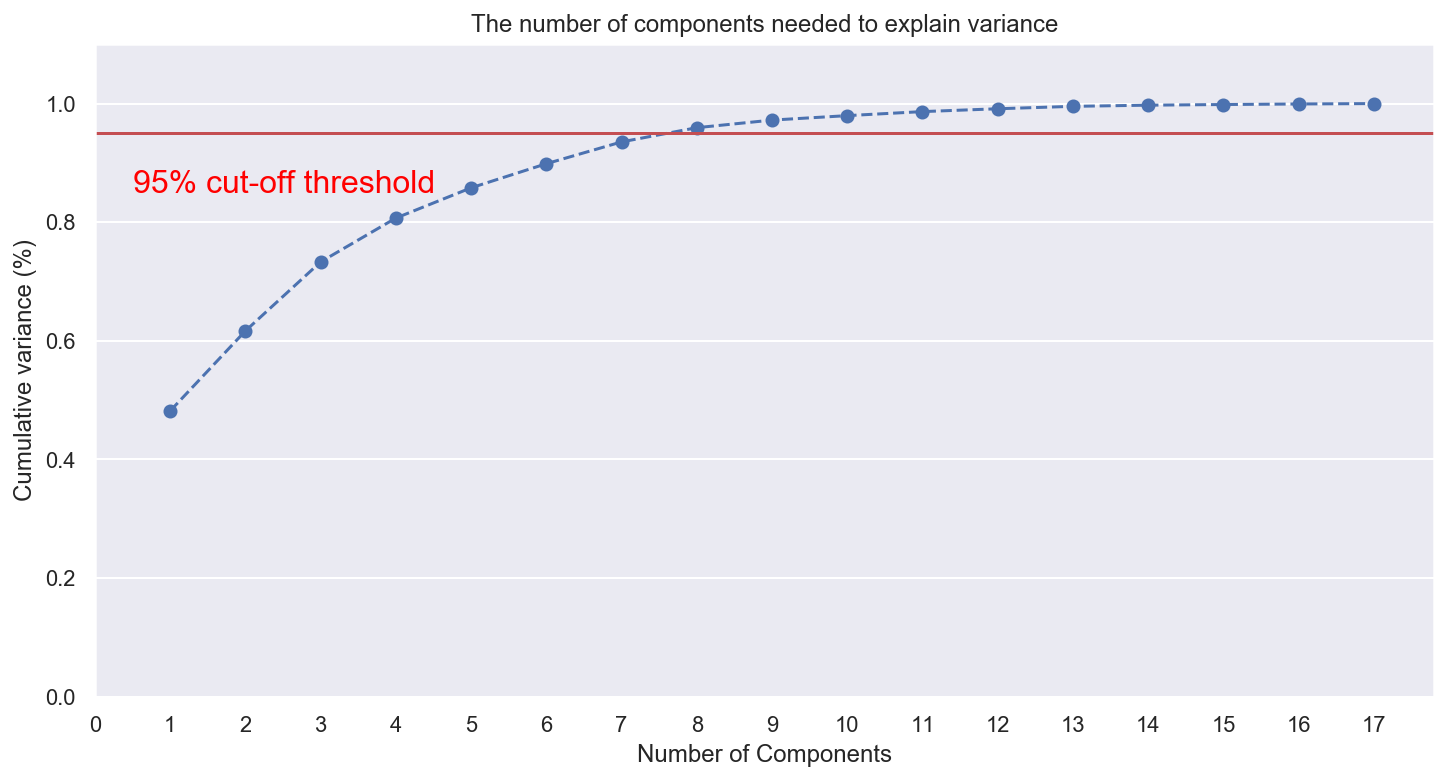

In [9]:
from sklearn.decomposition import PCA

pca = PCA().fit(data_rescaled)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 18, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 18, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [16]:
data = PCA(n_components=8).fit_transform(df_nf_for_pca)
df_pca_nf = pd.DataFrame(data, columns = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'])
df_pca_nf

,a,b,c,d,e,f,g,h
0,-5.355164,-1.214986,-5.086531,0.658442,0.940514,-0.585838,-0.294788,0.442854
1,0.308932,2.510935,4.497006,-0.984065,-1.478992,-0.435324,0.194483,-0.412921
2,-8.839981,0.677459,-1.967192,-2.036081,0.125918,-0.066738,0.384728,0.480123
3,10.051488,-0.566885,5.132438,0.971009,0.701212,-0.607807,-1.071331,0.245938
4,-0.330393,-0.477954,-3.242188,3.640961,-0.342450,0.379663,-0.014000,-0.091202
...,...,...,...,...,...,...,...,...
367,4.288338,7.381233,12.298386,0.529001,2.222680,-0.986353,-0.393702,-0.951805
368,-13.398806,-6.791973,-7.939190,0.824176,0.236870,-0.382686,-0.320278,0.186894
369,3.095986,-4.653300,1.341475,3.002086,0.768245,1.160235,0.017736,0.398694
370,-15.153197,-2.514759,6.709695,-1.654314,-0.873882,-0.078183,-0.474341,0.285960


In [17]:
df_pca_nf.corr()[df_pca_nf.corr()>0.7]

,a,b,c,d,e,f,g,h
a,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
b,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
c,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
d,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
e,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
f,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
g,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
h,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [30]:
pca_cols = df_nf_for_pca.columns.tolist()
npca_cols = df.columns.tolist()
npca_features = [item for item in npca_cols if item not in pca_cols]
len(npca_features)

21

In [31]:
df_1 = pd.concat([df[npca_features].reset_index(drop=True), df_pca_nf.reset_index(drop=True)], axis=1)
df_2 = df_1.drop('follower', axis=1)
df_2

,position,age,rating,value,passes_total,passes_accuracy,tackles_total,tackles_blocks,tackles_interceptions,fouls_drawn,...,games_lineups,games_played,a,b,c,d,e,f,g,h
0,2.00000,25.0000,2.33333,20.0,22.1875,3.2985,1.2112,0.1417,0.8504,0.5283,...,0.9277,77.6111,-5.355164,-1.214986,-5.086531,0.658442,0.940514,-0.585838,-0.294788,0.442854
1,4.00000,27.0000,5.25000,32.0,12.3211,4.0184,0.4629,0.0985,0.2659,2.8562,...,0.9947,101.5330,0.308932,2.510935,4.497006,-0.984065,-1.478992,-0.435324,0.194483,-0.412921
2,3.00000,24.0000,6.00000,24.0,58.0175,13.4528,1.0301,0.3802,1.3367,0.5641,...,1.0056,81.5444,-8.839981,0.677459,-1.967192,-2.036081,0.125918,-0.066738,0.384728,0.480123
3,4.00000,25.0000,7.00000,32.0,23.4897,9.1609,0.7758,0.1141,0.9355,1.6086,...,0.9697,87.6556,10.051488,-0.566885,5.132438,0.971009,0.701212,-0.607807,-1.071331,0.245938
4,2.00000,32.0000,4.83333,32.0,32.2437,6.1453,0.4321,0.0480,0.4225,0.6433,...,1.0754,104.1440,-0.330393,-0.477954,-3.242188,3.640961,-0.342450,0.379663,-0.014000,-0.091202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,4.00000,28.0000,3.88889,44.0,21.4995,4.2611,1.1758,0.0216,0.3452,3.0097,...,0.9924,92.7000,4.288338,7.381233,12.298386,0.529001,2.222680,-0.986353,-0.393702,-0.951805
368,3.76923,23.0769,1.61538,24.0,4.1158,2.3642,0.1397,0.0215,0.0430,0.2794,...,1.0531,93.0556,-13.398806,-6.791973,-7.939190,0.824176,0.236870,-0.382686,-0.320278,0.186894
369,4.00000,32.0000,6.15385,22.5,38.4786,8.6552,0.7696,0.0300,0.5297,1.6691,...,1.0294,100.0560,3.095986,-4.653300,1.341475,3.002086,0.768245,1.160235,0.017736,0.398694
370,4.00000,26.0000,6.54545,24.0,16.8656,7.4315,0.3936,0.0695,0.3010,1.8637,...,0.9492,86.3889,-15.153197,-2.514759,6.709695,-1.654314,-0.873882,-0.078183,-0.474341,0.285960


In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_rescaled = scaler.fit_transform(df_nf_for_pca)

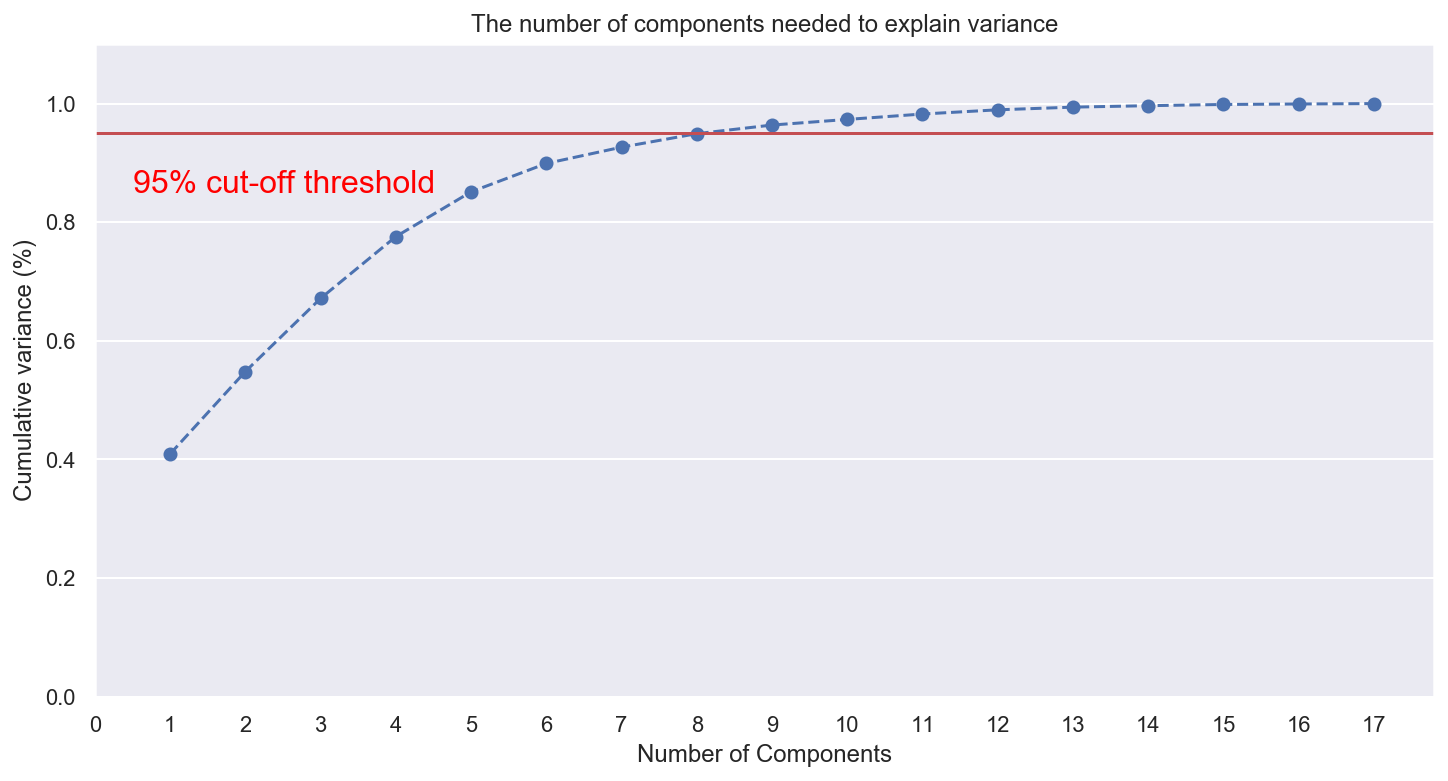

In [15]:
from sklearn.decomposition import PCA

pca = PCA().fit(data_rescaled)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 18, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 18, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [33]:
data = PCA(n_components=8).fit_transform(df_nf_for_pca)
df_pca_nf = pd.DataFrame(data, columns = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'])
df_pca_nf

,a,b,c,d,e,f,g,h
0,-5.355164,-1.214986,-5.086531,0.658442,0.940514,-0.585838,-0.294788,0.442854
1,0.308932,2.510935,4.497006,-0.984065,-1.478992,-0.435324,0.194483,-0.412921
2,-8.839981,0.677459,-1.967192,-2.036081,0.125918,-0.066738,0.384728,0.480123
3,10.051488,-0.566885,5.132438,0.971009,0.701212,-0.607807,-1.071331,0.245938
4,-0.330393,-0.477954,-3.242188,3.640961,-0.342450,0.379663,-0.014000,-0.091202
...,...,...,...,...,...,...,...,...
367,4.288338,7.381233,12.298386,0.529001,2.222680,-0.986353,-0.393702,-0.951805
368,-13.398806,-6.791973,-7.939190,0.824176,0.236870,-0.382686,-0.320278,0.186894
369,3.095986,-4.653300,1.341475,3.002086,0.768245,1.160235,0.017736,0.398694
370,-15.153197,-2.514759,6.709695,-1.654314,-0.873882,-0.078183,-0.474341,0.285960


##### DecisionTree Regressor

###### Follower X

In [40]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

z = 10
scores_rm = np.zeros([3, z])

cv = KFold(z, shuffle=True, random_state=0)
for i, (idx_train, idx_test) in enumerate(cv.split(df_2)):
    df_train = df_2.iloc[idx_train]
    df_test = df_2.iloc[idx_test]
    
    X_train = df_train.drop('value', axis=1).astype(float)
    X_train = StandardScaler().fit_transform(X_train)
    y_train = df_train['value']
    
    model = DecisionTreeRegressor(random_state = 42)
    result = model.fit(X_train, y_train)
    
    pred = result.predict(StandardScaler().fit_transform(df_test.drop('value', axis=1)))
    rsquared = r2_score(df_test.value, pred)
    mse = mean_squared_error(df_test.value, pred)
    
    scores_rm[0, i] = rsquared
    scores_rm[1, i] = mse
    scores_rm[2, i] = model.score(df_test.drop("value", axis=1), df_test['value'])
    
    print("R2 = {:.8f}".format(rsquared))
    print("mse = {:.8f}".format(mse))
    print("R2 Score = {:.8f}".format(scores_rm[2, i]))
    
print("모델 성능 : Metrics R2 = {}, R2 Score = {}, mse = {}".format(scores_rm[0].mean(),\
                                        scores_rm[2].mean(), scores_rm[1].mean()))

R2 = -1.04746774
mse = 652.19078947
R2 Score = -3.11463916
R2 = 0.08235094
mse = 357.34868421
R2 Score = -3.00652299
R2 = -0.15063488
mse = 283.40540541
R2 Score = -9.14256227
R2 = -1.45849064
mse = 593.39864865
R2 Score = -18.87087944
R2 = -0.21701131
mse = 557.40540541
R2 Score = -2.77539640
R2 = 0.06018697
mse = 1007.55405405
R2 Score = -0.07251802
R2 = -2.53134078
mse = 1596.61486486
R2 Score = -1.82604102
R2 = 0.26822021
mse = 653.27702703
R2 Score = -0.63887338
R2 = -1.01320435
mse = 637.45270270
R2 Score = -4.77248892
R2 = -0.33166489
mse = 509.50675676
R2 Score = -2.35454804
모델 성능 : Metrics R2 = -0.6339056469311919, R2 Score = -4.65744696367867, mse = 684.8154338549075


In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

z = 10
scores_rm = np.zeros([3, z])
mseListNf = []

cv = KFold(z, shuffle=True, random_state=0)
for n in range(1, 29):
    for m in range(1, 100):
        for i, (idx_train, idx_test) in enumerate(cv.split(df_2)):
            df_train = df_2.iloc[idx_train]
            df_test = df_2.iloc[idx_test]

            X_train = df_train.drop('value', axis=1).astype(float)
            X_train = StandardScaler().fit_transform(X_train)
            y_train = df_train['value']

            model = DecisionTreeRegressor(min_samples_leaf=m, max_features=n, random_state = 42)
            result = model.fit(X_train, y_train)

            pred = result.predict(StandardScaler().fit_transform(df_test.drop('value', axis=1)))
            rsquared = r2_score(df_test.value, pred)
            mse = mean_squared_error(df_test.value, pred)

            scores_rm[0, i] = rsquared
            scores_rm[1, i] = mse
            scores_rm[2, i] = model.score(df_test.drop("value", axis=1), df_test['value'])

        #     print("R2 = {:.8f}".format(rsquared))
        #     print("mse = {:.8f}".format(mse))
        #     print("R2 Score = {:.8f}".format(scores_rm[2, i]))

    #     print("모델 성능 : Metrics R2 = {}, R2 Score = {}, mse = {}".format(scores_rm[0].mean(), scores_rm[2].mean(), scores_rm[1].mean()))
        mseListNf.append(scores_rm[1].mean())

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

z = 10
scores_rm = np.zeros([3, z])
mseList = []

cv = KFold(z, shuffle=True, random_state=0)
for n in range(1, 29):
    for m in range(1, 100):
        for i, (idx_train, idx_test) in enumerate(cv.split(df_1)):
            df_train = df_1.iloc[idx_train]
            df_test = df_1.iloc[idx_test]

            X_train = df_train.drop('value', axis=1).astype(float)
            X_train = StandardScaler().fit_transform(X_train)
            y_train = df_train['value']

            model = DecisionTreeRegressor(min_samples_leaf=m, max_features=n, random_state = 42)
            result = model.fit(X_train, y_train)

            pred = result.predict(StandardScaler().fit_transform(df_test.drop('value', axis=1)))
            rsquared = r2_score(df_test.value, pred)
            mse = mean_squared_error(df_test.value, pred)

            scores_rm[0, i] = rsquared
            scores_rm[1, i] = mse
            scores_rm[2, i] = model.score(df_test.drop("value", axis=1), df_test['value'])

        #     print("R2 = {:.8f}".format(rsquared))
        #     print("mse = {:.8f}".format(mse))
        #     print("R2 Score = {:.8f}".format(scores_rm[2, i]))

    #     print("모델 성능 : Metrics R2 = {}, R2 Score = {}, mse = {}".format(scores_rm[0].mean(), scores_rm[2].mean(), scores_rm[1].mean()))
        mseList.append(scores_rm[1].mean())

In [ ]:
dVal = list(range(1, 500))
fig = plt.figure()
fig.show()
ax = fig.add_subplot(111)

ax.plot(dVal, mseListNf, color='red', label='No Follower')
ax.plot(dVal, mseList, color='black', label='Follower')
plt.legend(loc='upper right')
# plt.title('Support Vector Regressor (Gaussian) with and without Follower')
# plt.xlabel('C Value')
plt.ylabel('Mean Squared Error')
plt.draw()

In [ ]:
pd.DataFrame(model.feature_importances_, index=df_2.drop('value', axis=1).columns, columns=['Feature_Importances']).sort_values(by='Feature_Importances', ascending=False)

###### Follower O

In [42]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

z = 10
scores_rm = np.zeros([3, z])

cv = KFold(z, shuffle=True, random_state=0)
for i, (idx_train, idx_test) in enumerate(cv.split(df_1)):
    df_train = df_1.iloc[idx_train]
    df_test = df_1.iloc[idx_test]
    
    X_train = df_train.drop('value', axis=1).astype(float)
    X_train = StandardScaler().fit_transform(X_train)
    y_train = df_train['value']
    
    model = DecisionTreeRegressor(random_state = 42)
    result = model.fit(X_train, y_train)
    
    pred = result.predict(StandardScaler().fit_transform(df_test.drop('value', axis=1)))
    rsquared = r2_score(df_test.value, pred)
    mse = mean_squared_error(df_test.value, pred)
    
    scores_rm[0, i] = rsquared
    scores_rm[1, i] = mse
    scores_rm[2, i] = model.score(df_test.drop("value", axis=1), df_test['value'])
    
    print("R2 = {:.8f}".format(rsquared))
    print("mse = {:.8f}".format(mse))
    print("R2 Score = {:.8f}".format(scores_rm[2, i]))
    
print("모델 성능 : Metrics R2 = {}, R2 Score = {}, mse = {}".format(scores_rm[0].mean(), scores_rm[2].mean(), scores_rm[1].mean()))

R2 = -0.75251160
mse = 558.23684211
R2 Score = -0.04797104
R2 = -0.11272783
mse = 433.31578947
R2 Score = -0.52967977
R2 = -1.39426643
mse = 589.71621622
R2 Score = -7.12231253
R2 = -0.55846522
mse = 376.16216216
R2 Score = -3.79145753
R2 = -0.75801014
mse = 805.18918919
R2 Score = -7.09599605
R2 = 0.29801101
mse = 752.58783784
R2 Score = -2.89310417
R2 = -0.06508558
mse = 481.55405405
R2 Score = -0.42146408
R2 = 0.24222930
mse = 676.47972973
R2 Score = -2.31437926
R2 = -1.19659346
mse = 695.52027027
R2 Score = -5.34634275
R2 = 0.19740202
mse = 307.08108108
R2 Score = -2.54626173
모델 성능 : Metrics R2 = -0.4100017929541557, R2 Score = -3.210896891096155, mse = 567.5843172119487
